# Исследование объявлений о продаже квартир
## Цель исследования:
        Провести иследование данных о квартирах в Иркутске предоставленных сайтом Циан.
## Задачи исследования:
        Доказать, что цена за квадратный метр зависит от района продажи квартиры
## Декомпозиция работы:
        1. Подготовка данных
        2. Предобработка данных
        3. Анализ данных
        4. Визуализация данных
        5. Вывод о задачах исследования

### 1. Подготовка данных

In [ ]:
#Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import requests

# импорт библиотек для отоброжения графика на гитхаб
# import plotly.io as pio
# pio.renderers.default='notebook'

#показать всю информацию в колонках
pd.set_option('display.max_colwidth', None)

#Загружаем данные
data = pd.read_csv("https://raw.githubusercontent.com/DanVik24/Project/main/flat_3.csv", sep=';')
display(data.head())

,ID,Количество комнат,Тип,район,Адрес,"Площадь, м2",Этаж,Цена,Ремонт,Ссылка на объявление
0,300151528,2,Продажа квартиры в новостройке,Свердловский,"Иркутская область, Иркутск, улица Костычева",34.8,4/12,5220000,NaN,https://www.cian.ru/sale/flat/300151528
1,297027698,2,Продажа квартиры,Свердловский,"Иркутская область, Иркутск, улица Помяловского, 30",48.0,5/5,4450000,Косметический,https://www.cian.ru/sale/flat/297027698
2,300140904,"2, Аппартаменты",Продажа квартиры,Свердловский,"Иркутская область, Иркутск, улица Сергеева, 5/8",58.7,2/4,5700000,Евроремонт,https://www.cian.ru/sale/flat/300140904
3,295915593,1,Продажа квартиры,Свердловский,"Иркутская область, Иркутск, улица Багратиона, 54/11",43.0,7/9,5990000,Косметический,https://www.cian.ru/sale/flat/295915593
4,295895678,3,Продажа квартиры в новостройке,Свердловский,"Иркутская область, Иркутск, улица Костычева",66.1,12/12,7204900,NaN,https://www.cian.ru/sale/flat/295895678


In [ ]:
# переименование столбцов для удобного использования
data = data.rename(columns={'Количество комнат': 'rooms',
                               'Тип': 'type',
                               'район': 'district',
                               'Адрес': 'address',
                               'Площадь, м2': 'area',
                               'Этаж': 'floor',
                               'Цена': 'price',
                               'Ремонт': 'repair',
                               'Ссылка на объявление': 'link'})
# смотрим основную информацию о датафрейме
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        763 non-null    int64  
 1   rooms     742 non-null    object 
 2   type      763 non-null    object 
 3   district  763 non-null    object 
 4   address   763 non-null    object 
 5   area      763 non-null    float64
 6   floor     763 non-null    object 
 7   price     763 non-null    int64  
 8   repair    86 non-null     object 
 9   link      763 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 59.7+ KB


None

In [ ]:
# просмотр уникальных данных в столбцах:
display(data['rooms'].unique())
display(data['type'].unique())
display(data['district'].unique())
display(data['repair'].unique())

array(['2', '2, Аппартаменты', '1', '3', nan, '4', '2, Изолированная',
       '2, Смежная', '3, Изолированная', '5', '4, Смежная',
       '2, Оба варианта', '2, Изолированная, Аппартаменты',
       '3, Оба варианта', '3, Смежная', '4, Изолированная'], dtype=object)

array(['Продажа квартиры в новостройке', 'Продажа квартиры'], dtype=object)

array(['Свердловский', 'Правобережный', 'Октябрьский', 'Ленинский'],
      dtype=object)

array([nan, 'Косметический', 'Евроремонт', 'Дизайнерский', 'Без ремонта'],
      dtype=object)

In [ ]:
# изменим столбец с данными о колве квартир - уберем лишнюю информацию
data['rooms'] = data['rooms'].str.replace(',', ' ').str.replace('\D', '', regex=True) # удаляет данные в ячейке после ","
data.sample(5)

,ID,rooms,type,district,address,area,floor,price,repair,link
622,299050806,1,Продажа квартиры в новостройке,Ленинский,"Иркутская область, Иркутск, Ново-Ленино мкр, Мега ЖК",29.72,15/18,3120600,NaN,https://www.cian.ru/sale/flat/299050806
651,294843659,3,Продажа квартиры,Ленинский,"Иркутская область, Иркутск, улица Новаторов, 24Г",52.00,3/5,4400000,Косметический,https://www.cian.ru/sale/flat/294843659
752,283703082,2,Продажа квартиры в новостройке,Ленинский,"Иркутская область, Иркутск, Гравийная улица, 22/3",47.15,6/15,5640000,NaN,https://www.cian.ru/sale/flat/283703082
653,299046894,1,Продажа квартиры в новостройке,Ленинский,"Иркутская область, Иркутск, Ново-Ленино мкр, Первый Ленинский квартал ЖК, 1",37.10,1/13,4433450,NaN,https://www.cian.ru/sale/flat/299046894
532,298599604,1,Продажа квартиры в новостройке,Октябрьский,"Иркутская область, Иркутск, ИВАТУ городок, Авиатор ЖК",39.32,14/16,5614500,NaN,https://www.cian.ru/sale/flat/298599604


### 2. Предобработка данных
Перед работой с данными необходимо произвести следующие изменения и анализ данных:
##### 1. Создадим дополнительные столбцы
Добавим столбцы "Этажей в доме" и столбец "Цена за квадратный метр":
1. Разделим столбец "floor": Возьмем из столбца "floor" информацию за знаком "/" и добавим столбец "floor_all" с данными о количестве этажей в доме
2. Добавим данные о цене за квадратный метр в новый столбец "price_square"


##### 2. Изменим типы объектов в следующих столбцах:
*rooms* - изменить на тип объекта int\
*floor* - изменить на int

##### 3. Работа с пропусками и дубликатами в данных.
1. Определим количество пропущенных значениях в столбцах и если есть пропуски, то для дальнейшей работы необходимо их убрать, заменив их на подходящие по логике данные.
2. Проверим данные на дубликаты по столбцам "Адрес" и "ID" - там не должны быть дубли, если они будут то строки необходимо удалить

#### Разделим столбец "floor" и добавим столбец "price_square" с данными о цене за квадратный метр

In [ ]:
# добавим столбец 'floor_all'
data['floor_all'] = data['floor'].str.split('/').str.get(1)
data['floor'] = data['floor'].str.split('/').str.get(0)
data['price_square'] = (data['price'] / data['area'])/1000 # создадим столбец "price_square" с данными о цене за кв.м. и
data['price'] = data['price']/1000000  # поделим результат на 100 для лучшего восприятия цены

In [ ]:
data['price'] = data['price'].round(1) #  округлим числа до десятых
data['price_square'] = data['price_square'].round(1)
data.sample(5)

,ID,rooms,type,district,address,area,floor,price,repair,link,floor_all,price_square
572,299872831,NaN,Продажа квартиры в новостройке,Ленинский,"Иркутская область, Иркутск, улица Мира, 32",37.32,4,5.4,NaN,https://www.cian.ru/sale/flat/299872831,13,143.4
76,294860880,NaN,Продажа квартиры в новостройке,Свердловский,"Иркутская область, Иркутск, проезд Юрия Тена, 2/4",60.25,9,16.3,NaN,https://www.cian.ru/sale/flat/294860880,9,270.0
706,296464559,1,Продажа квартиры в новостройке,Ленинский,"Иркутская область, Иркутск, Пулковский переулок, 28",43.61,1,5.0,NaN,https://www.cian.ru/sale/flat/296464559,15,115.8
126,299991640,1,Продажа квартиры в новостройке,Свердловский,"Иркутская область, Иркутск, улица Костычева",42.30,8,5.0,NaN,https://www.cian.ru/sale/flat/299991640,12,118.0
58,292829330,3,Продажа квартиры в новостройке,Свердловский,"Иркутская область, Иркутск, улица Старо-Кузьмихинская",51.70,11,8.6,NaN,https://www.cian.ru/sale/flat/292829330,12,165.6


Теперь данные в столбце "price" отображаются в млн., а данные в столбце "price_square" в тыс./за кв.м.

#### 2. Изменим типы объектов

In [ ]:
# изменим тип данных для дальнейшего исследовани
data['rooms'] = data['rooms'].fillna(0).astype('int')
data['floor'] = data['floor'].fillna(0).astype('int')

In [ ]:
display(data.sample(5))  # проверим изменненые данные
display(data.info())

,ID,rooms,type,district,address,area,floor,price,repair,link,floor_all,price_square
710,285801072,1,Продажа квартиры в новостройке,Ленинский,"Иркутская область, Иркутск, Иркутск-2 мкр, Зенит ЖК",37.11,13,5.2,NaN,https://www.cian.ru/sale/flat/285801072,13,139.5
673,296464612,1,Продажа квартиры в новостройке,Ленинский,"Иркутская область, Иркутск, Пулковский переулок, 28",36.87,15,4.8,NaN,https://www.cian.ru/sale/flat/296464612,15,130.2
488,298599456,1,Продажа квартиры в новостройке,Октябрьский,"Иркутская область, Иркутск, ИВАТУ городок, Авиатор ЖК",36.30,6,5.6,NaN,https://www.cian.ru/sale/flat/298599456,16,154.2
245,299629959,1,Продажа квартиры в новостройке,Правобережный,"Иркутская область, Иркутск, улица Петрова, 18",39.56,2,5.4,NaN,https://www.cian.ru/sale/flat/299629959,16,135.9
737,283702755,2,Продажа квартиры в новостройке,Ленинский,"Иркутская область, Иркутск, Гравийная улица, 22/7",47.15,6,5.4,NaN,https://www.cian.ru/sale/flat/283702755,13,113.9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            763 non-null    int64  
 1   rooms         763 non-null    int64  
 2   type          763 non-null    object 
 3   district      763 non-null    object 
 4   address       763 non-null    object 
 5   area          763 non-null    float64
 6   floor         763 non-null    int64  
 7   price         763 non-null    float64
 8   repair        86 non-null     object 
 9   link          763 non-null    object 
 10  floor_all     763 non-null    object 
 11  price_square  763 non-null    float64
dtypes: float64(3), int64(3), object(6)
memory usage: 71.7+ KB


None

#### 3. Определим количество пропущенных значениях и исследуем на дубликаты в столбцах

In [ ]:
# посчитаем пропуски
print('Количество дубликатов:', data.duplicated().sum())
print('Количие пропусков:')
data.isnull().sum()

Количество дубликатов: 0
Количие пропусков:


ID                0
rooms             0
type              0
district          0
address           0
area              0
floor             0
price             0
repair          677
link              0
floor_all         0
price_square      0
dtype: int64

Дубликатов данных нет.
Пропуски в столбце с ремонтом и кол-вом комнат из-за отсутсивия информации - для работы с эти столбцом необходимо заменить пропущенные значения на 0 - как "нет информации о ремонте/комнатах":

In [ ]:
# замена пропусков
data['repair'] = data['repair'].fillna(0)

### 3. Анализ данных
#### Исследуем количество объектов по категориям: район продаж, количество комнат, площадь, цена за квадратный метр. Построим визуализации.

district
Октябрьский      200
Ленинский        196
Правобережный    195
Свердловский     172
Name: count, dtype: int64

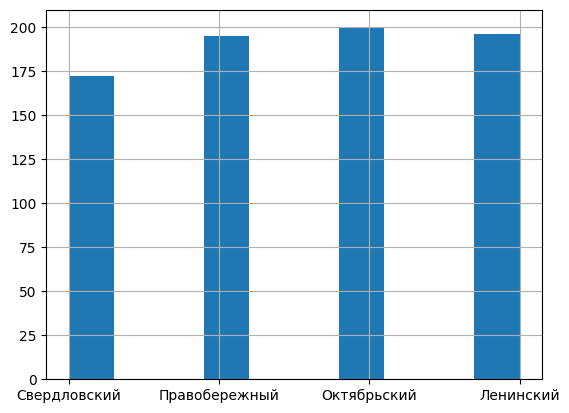

In [ ]:
# районы
display(data['district'].value_counts())
data['district'].hist();

Больше всего объявлений о продаже в Октябрьском районе

In [ ]:
data['type'].unique() # посмотрим данные о типе квартир

array(['Продажа квартиры в новостройке', 'Продажа квартиры'], dtype=object)

Изменим столбец с данными о типе квартиры: заменим данные на "second" - вторичное жилье и "new" - новостройка.

In [ ]:
data['type']
data = data.replace({'type':{'Продажа квартиры в новостройке':"new", 'Продажа квартиры': "second"}})
data.head()

,ID,rooms,type,district,address,area,floor,price,repair,link,floor_all,price_square
0,300151528,2,new,Свердловский,"Иркутская область, Иркутск, улица Костычева",34.8,4,5.2,0,https://www.cian.ru/sale/flat/300151528,12,150.0
1,297027698,2,second,Свердловский,"Иркутская область, Иркутск, улица Помяловского, 30",48.0,5,4.4,Косметический,https://www.cian.ru/sale/flat/297027698,5,92.7
2,300140904,2,second,Свердловский,"Иркутская область, Иркутск, улица Сергеева, 5/8",58.7,2,5.7,Евроремонт,https://www.cian.ru/sale/flat/300140904,4,97.1
3,295915593,1,second,Свердловский,"Иркутская область, Иркутск, улица Багратиона, 54/11",43.0,7,6.0,Косметический,https://www.cian.ru/sale/flat/295915593,9,139.3
4,295895678,3,new,Свердловский,"Иркутская область, Иркутск, улица Костычева",66.1,12,7.2,0,https://www.cian.ru/sale/flat/295895678,12,109.0


In [ ]:
data['rooms'].unique()

array([2, 1, 3, 0, 4, 5])

In [ ]:
data[data['rooms'] == 0]

,ID,rooms,type,district,address,area,floor,price,repair,link,floor_all,price_square
10,290177501,0,new,Свердловский,"Иркутская область, Иркутск, Союз Приорити ЖК",44.21,9,8.3,0,https://www.cian.ru/sale/flat/290177501,9,187.5
12,290331577,0,new,Свердловский,"Иркутская область, Иркутск, проезд Юрия Тена, 2/4",55.26,8,11.1,0,https://www.cian.ru/sale/flat/290331577,9,200.0
75,294892664,0,new,Свердловский,"Иркутская область, Иркутск, проезд Юрия Тена, 2/4",60.25,8,16.3,0,https://www.cian.ru/sale/flat/294892664,9,270.0
76,294860880,0,new,Свердловский,"Иркутская область, Иркутск, проезд Юрия Тена, 2/4",60.25,9,16.3,0,https://www.cian.ru/sale/flat/294860880,9,270.0
77,294860878,0,new,Свердловский,"Иркутская область, Иркутск, проезд Юрия Тена, 2/4",68.32,9,18.4,0,https://www.cian.ru/sale/flat/294860878,9,270.0
78,295855794,0,new,Свердловский,"Иркутская область, Иркутск, проезд Юрия Тена, 2/4",68.33,5,18.4,0,https://www.cian.ru/sale/flat/295855794,9,270.0
80,299996076,0,second,Свердловский,"Иркутская область, Иркутск, Радужный мкр, 112",26.00,7,3.9,0,https://www.cian.ru/sale/flat/299996076,14,150.0
367,299835129,0,new,Октябрьский,"Иркутская область, Иркутск, улица Пискунова, 132",39.69,10,7.2,0,https://www.cian.ru/sale/flat/299835129,17,181.4
368,293372112,0,new,Октябрьский,"Иркутская область, Иркутск, Байкальская улица, 418",48.93,7,9.9,0,https://www.cian.ru/sale/flat/293372112,9,201.5
373,298296152,0,second,Октябрьский,"Иркутская область, Иркутск, улица Пискунова, 148/2",29.10,4,4.0,Косметический,https://www.cian.ru/sale/flat/298296152,16,137.5


По полученным данным большенство квартир с кол-вом комнат = 0 это новостройки без ремонта. Остальные 5 квартир имеют площадь менее 31 квадрата - значит это студии. Оставим как есть.

rooms
1    539
2    127
3     60
0     21
4     15
5      1
Name: count, dtype: int64

<Axes: >

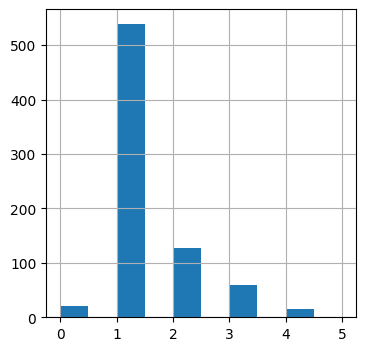

In [ ]:
display(data['rooms'].value_counts()) #посчитаем количество квартир в зависимости от количества комнат
data['rooms'].hist(figsize=(4,4)) #построим диаграмму

In [ ]:
#сгруппируем данные по району
data_district = data.pivot_table(index = 'district', values = 'ID', columns='rooms', aggfunc = 'count').reset_index().fillna(0)
display(data_district)
display(data_district.info())

rooms,district,0,1,2,3,4,5
0,Ленинский,3.0,132.0,41.0,17.0,3.0,0.0
1,Октябрьский,11.0,140.0,30.0,15.0,4.0,0.0
2,Правобережный,0.0,168.0,11.0,11.0,5.0,0.0
3,Свердловский,7.0,99.0,45.0,17.0,3.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   district  4 non-null      object 
 1   0         4 non-null      float64
 2   1         4 non-null      float64
 3   2         4 non-null      float64
 4   3         4 non-null      float64
 5   4         4 non-null      float64
 6   5         4 non-null      float64
dtypes: float64(6), object(1)
memory usage: 352.0+ bytes


None

### 4. Визуализация данных
#### Визуализация данных по районам

In [ ]:
# строим гистограммы
fig = px.histogram(data_district, # загружаем данные
                   x=[0, 1, 2, 3, 4, 5], # указываем столбец с данными для оси X
                   y= 'district',
                   title='Распределение по районам') # указываем заголовок
fig.update_layout(yaxis_title ='Районы') # подпись для оси X
fig.update_layout(xaxis_title ='Количество комнат') # подпись для оси Y
fig.show(); # выводим график

В полученном результате видим преобладание объявлений о продаже однокомнатных квартир в любом из районов

In [ ]:
# можем посмотреть колличество каких квартир продается,
# новостроек или вторичного жилья, по районам
data_price4 = data.pivot_table(index = 'district', values = 'ID', columns='type', aggfunc = 'count').reset_index()
data_price4['%_new'] = 100*(data_price4['new'] / data_price4['new'].sum()).round(3)
data_price4['%_second'] = 100*(data_price4['second'] / data_price4['second'].sum()).round(3)

data_price4

type,district,new,second,%_new,%_second
0,Ленинский,162,34,24.6,32.4
1,Октябрьский,167,33,25.4,31.4
2,Правобережный,185,10,28.1,9.5
3,Свердловский,144,28,21.9,26.7


Новостроек много в Правобережном районе - 28%. А объявлений вторичного жилья больше в Ленинском районе - 32,4%.

In [ ]:
# можем посмотреть колличество скольки комнатных квартир,
# новостроек или вторичного жилья, в каких районах продается больше чем в остальных
data_price2 = data.pivot_table(index = ['district', 'rooms'], values = 'ID', columns='type', aggfunc = 'count')
data_price2

type                   new  second
district      rooms               
Ленинский     0        1.0     2.0
              1      122.0    10.0
              2       32.0     9.0
              3        7.0    10.0
              4        NaN     3.0
Октябрьский   0        9.0     2.0
              1      137.0     3.0
              2        9.0    21.0
              3        9.0     6.0
              4        3.0     1.0
Правобережный 1      164.0     4.0
              2        9.0     2.0
              3        8.0     3.0
              4        4.0     1.0
Свердловский  0        6.0     1.0
              1       93.0     6.0
              2       31.0    14.0
              3       11.0     6.0
              4        3.0     NaN
              5        NaN     1.0

#### Посмотрим заполнение данных в столбце с данными - цена за кв.метр

In [ ]:
# цена за квартиру
data['price'].describe().round(3)

count    763.000
mean       6.240
std        2.825
min        1.800
25%        5.150
50%        5.600
75%        6.000
max       45.000
Name: price, dtype: float64

count    763.0
mean     139.3
std       28.4
min       67.3
25%      119.8
50%      140.0
75%      151.5
max      346.2
Name: price_square, dtype: float64

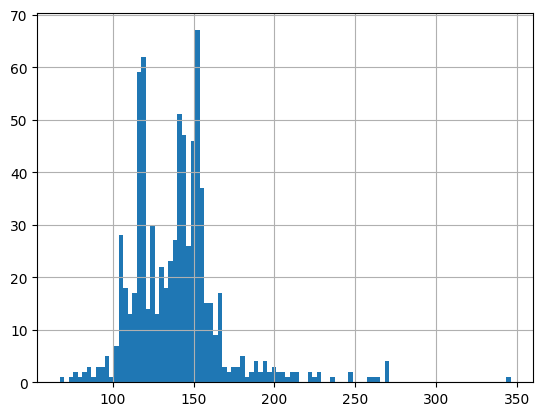

In [ ]:
# цена за квадратный метр
display(data['price_square'].describe().round(1))
data['price_square'].hist(bins=100);

   Средняя цена за квадратный метр - 67.3 т.р./кв. А максиматльная сумма за квадрат - 346.2 т.р./кв Посмотрим эти объявления:

In [ ]:
data[data['price_square'] == 67.3]

,ID,rooms,type,district,address,area,floor,price,repair,link,floor_all,price_square
669,294011755,3,second,Ленинский,"Иркутская область, Иркутск, Алтайская улица, 2",71.3,2,4.8,0,https://www.cian.ru/sale/flat/294011755,2,67.3


In [ ]:
data[data['price_square'] == 346.2]

,ID,rooms,type,district,address,area,floor,price,repair,link,floor_all,price_square
434,297865294,3,second,Октябрьский,"Иркутская область, Иркутск, улица Карла Либкнехта, 201",130.0,17,45.0,Дизайнерский,https://www.cian.ru/sale/flat/297865294,17,346.2


Для просмотра квартир по районам с ценой за квадратный метр создадим категории в датафрейме data - столбец cat_pricesquare:

0–119 — 'менее 119 т.р за кв.м';\
120–140 — 'от 120 до 140 т.р за кв.м';\
141–152 — 'от 141 до 152 т.р за кв.м';\
152 и выше — 'свыше 152 т.р за кв.м'.

In [ ]:
# создадим функцию для категорий по цене за кв.м.
def cat_pricesquare(income):
    try:
        if 0 <= income <= 119:
            return 'менее 119 т.р за кв.м'
        elif 120 <= income <= 140:
            return 'от 120 до 140 т.р за кв.м'
        elif 141 <= income <= 152:
            return 'от 141 до 152 т.р за кв.м'
        elif income >= 153:
            return 'свыше 152 т.р за кв.м'
    except:
        pass

In [ ]:
# создадим столбец и применю функцию
data['cat_pricesquare'] = data['price_square'].apply(cat_pricesquare)
display(data.sample(5))

,ID,rooms,type,district,address,area,floor,price,repair,link,floor_all,price_square,cat_pricesquare
354,299630246,1,new,Правобережный,"Иркутская область, Иркутск, улица Петрова, 18",40.00,14,6.1,0,https://www.cian.ru/sale/flat/299630246,16,151.8,от 141 до 152 т.р за кв.м
70,274157075,3,second,Свердловский,"Иркутская область, Иркутск, улица Лермонтова, 136/1",134.50,3,11.5,Дизайнерский,https://www.cian.ru/sale/flat/274157075,6,85.5,менее 119 т.р за кв.м
405,296478578,0,new,Октябрьский,"Иркутская область, Иркутск, улица Пискунова, 134",63.06,19,9.9,0,https://www.cian.ru/sale/flat/296478578,19,157.0,свыше 152 т.р за кв.м
472,298600261,1,new,Октябрьский,"Иркутская область, Иркутск, ИВАТУ городок",36.25,13,5.5,0,https://www.cian.ru/sale/flat/298600261,16,151.3,от 141 до 152 т.р за кв.м
564,287276296,1,new,Октябрьский,"Иркутская область, Иркутск, ИВАТУ городок, Авиатор ЖК, с7/2",34.30,5,5.7,0,https://www.cian.ru/sale/flat/287276296,9,165.8,свыше 152 т.р за кв.м


In [ ]:
# создадим сводную таблицу по кол-ву обявлений
data_price5 = data.pivot_table(index = 'district', values = 'ID', columns='cat_pricesquare', aggfunc = 'count').reset_index()
data_price5

cat_pricesquare,district,менее 119 т.р за кв.м,от 120 до 140 т.р за кв.м,от 141 до 152 т.р за кв.м,свыше 152 т.р за кв.м
0,Ленинский,91,77,12,8
1,Октябрьский,7,28,73,77
2,Правобережный,12,52,96,35
3,Свердловский,77,37,12,46


Дорогие квартиры, с ценой более 152тр. за кв.м. в Октябрьском районе, а в Ленинском - самые не дорогие с ценой до 119т.р. за кв.м.

In [ ]:
# строим гистограммы
fig = px.histogram(data_price5, # загружаем данные
                   x=["менее 119 т.р за кв.м", "от 120 до 140 т.р за кв.м", "от 141 до 152 т.р за кв.м", "свыше 152 т.р за кв.м"], # указываем столбец с данными для оси X
                   y= 'district',
                   title='Распределение по цене за квадрат') # указываем заголовок
fig.update_layout(yaxis_title ='Районы') # подпись для оси X
fig.update_layout(xaxis_title ='Цена за квадратный метр') # подпись для оси Y
fig.show(); # выводим график

## Вывод:
* Больше всего объявлений о продаже в Октябрьском районе
* Преобладание объявлений о продаже однокомнатных квартир в любом из районов
* Новостроек много в Правобережном районе - 28%. А объявлений вторичного жилья больше в Ленинском районе - 32,4%.
* Дорогие квартиры, с ценой более 152тр. за кв.м. в Октябрьском районе, а в Ленинском - самые не дорогие с ценой до 119т.р. за кв.м.

#### По последней визуализации видно, что количество предложений недорогих квартир в Ленинском и Свердловском районе. А преобладание более дорогих квартир от 152тр за кв.м. - в Октябрьском районе. Из чего следует вывод, что цена за квадратный метр зависит от района продажи